In [10]:
%pylab inline
from glob import glob
from numpy import load
import pandas as pd


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
path='/Users/yoavfreund/datasets/poverty_v1.1/anon_images/'
#use the following line when running on datahub
#poverty_dir = '/dsmlp/datasets/cs255-sp22-a00-public/poverty/anon_images/'


band_names=['Red','Green','Blue','NIR','SWIR1','SWIR2','TEMP1','NL']

In [12]:
files=glob(f'{path}*.npz')
len(files)

19669

In [14]:
#load table entries
train_table='../public_tables/train.csv'
!ls -l $train_table

df=pd.read_csv(train_table,index_col=0)
df.index=df['filename']
df.head(3)

-rw-r--r--  1 yoavfreund  wheel  786422 May 23 16:59 ../public_tables/train.csv


filename  country  wealthpooled  urban  label    nl_mean
filename                                                                      
image14517.npz  image14517.npz        6     -1.019361  False      0  -0.086633
image7407.npz    image7407.npz        6     -1.143002  False      0  -0.141589
image390.npz      image390.npz        6      1.056769   True      0  15.228898

/var/folders/cl/mbdp3zfx4cg9mmnz60g052540000gn/T/ipykernel_98240/2552189767.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=[14,8])


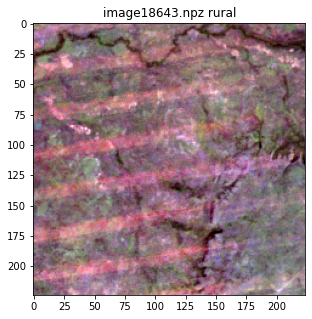

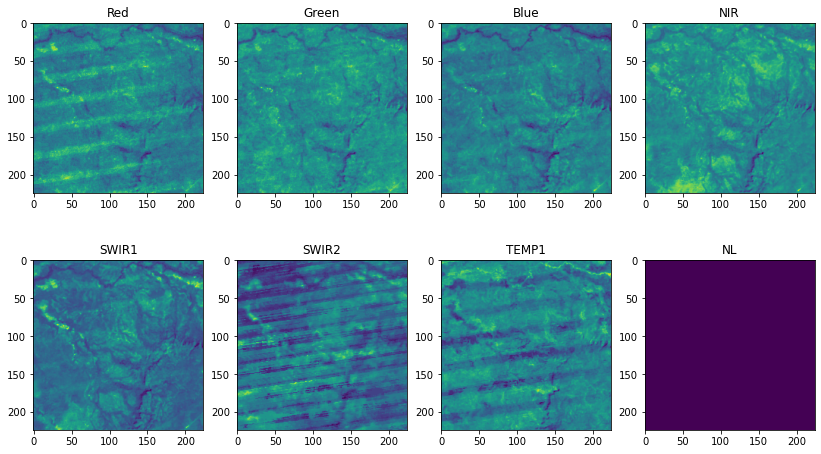

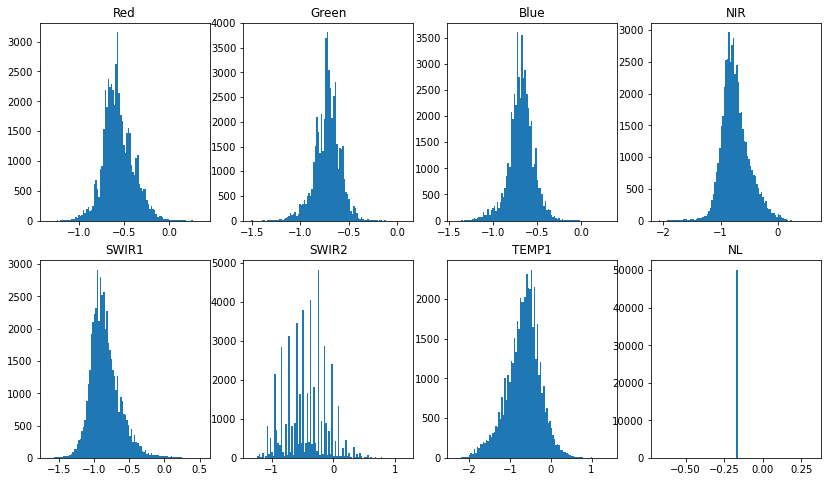

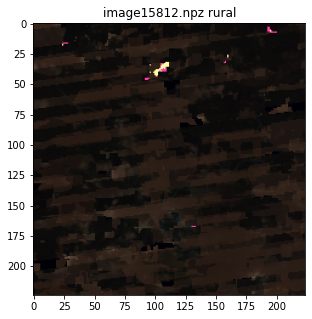

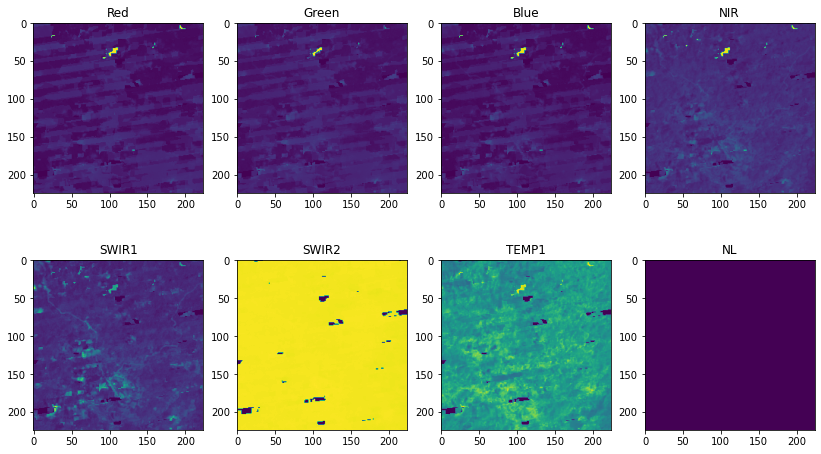

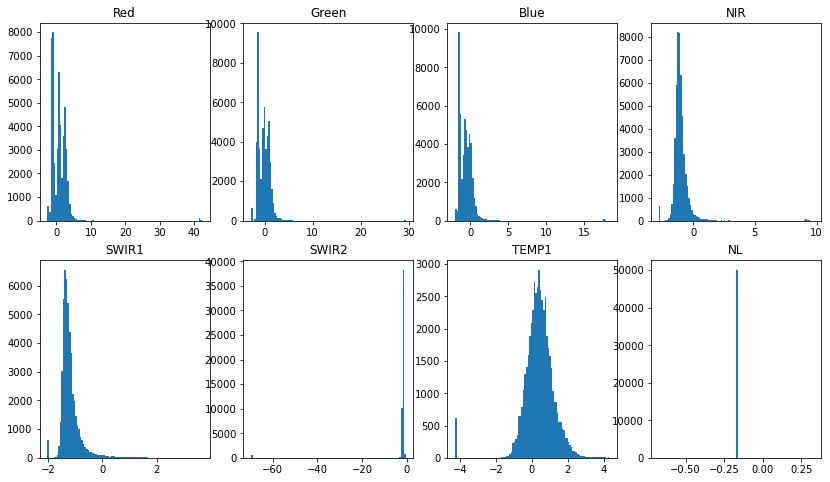

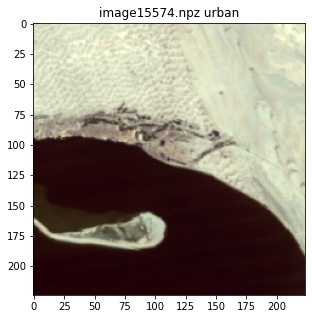

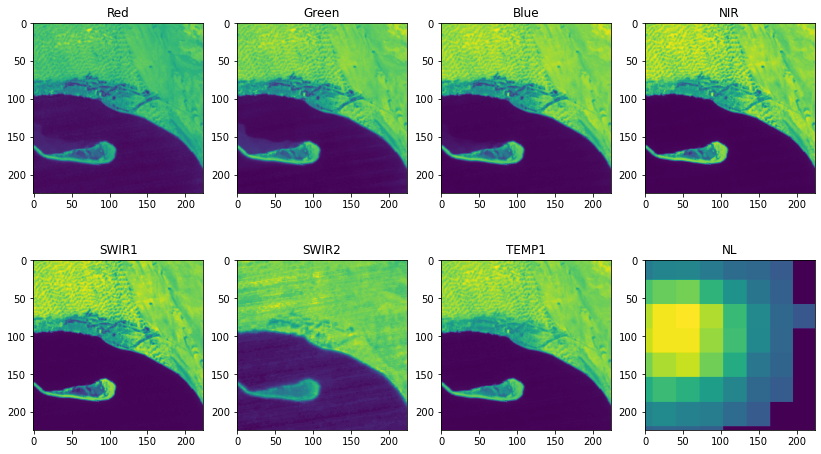

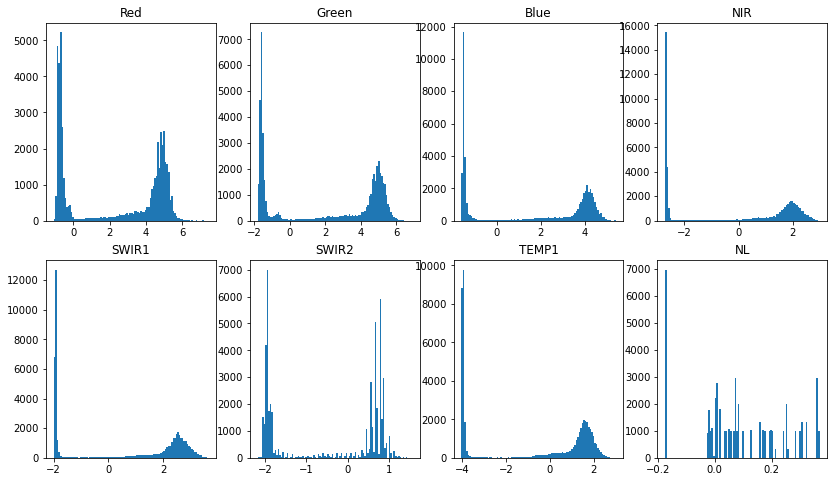

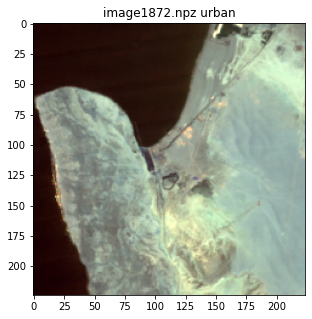

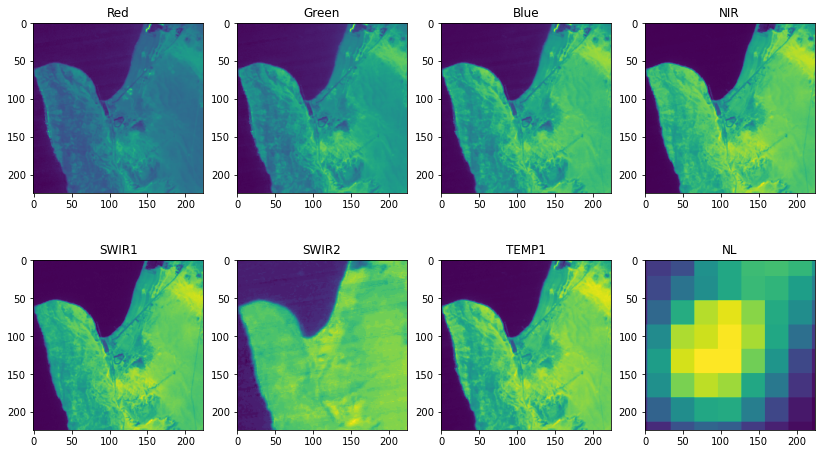

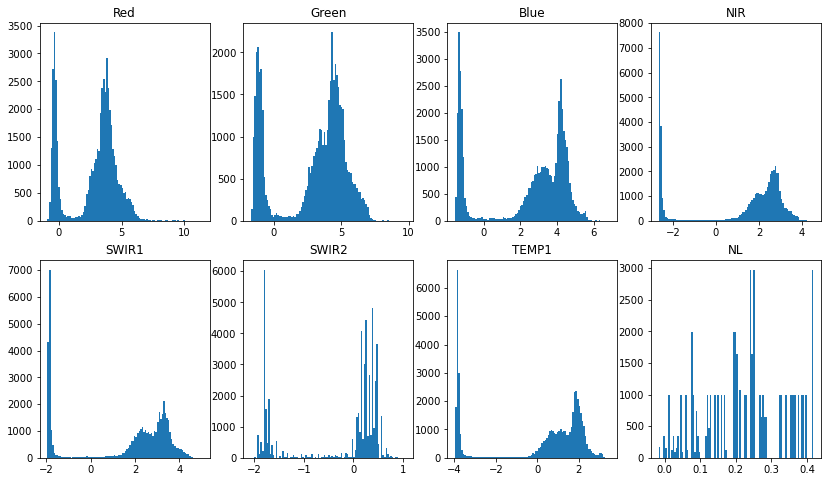

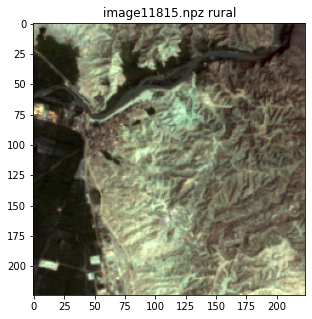

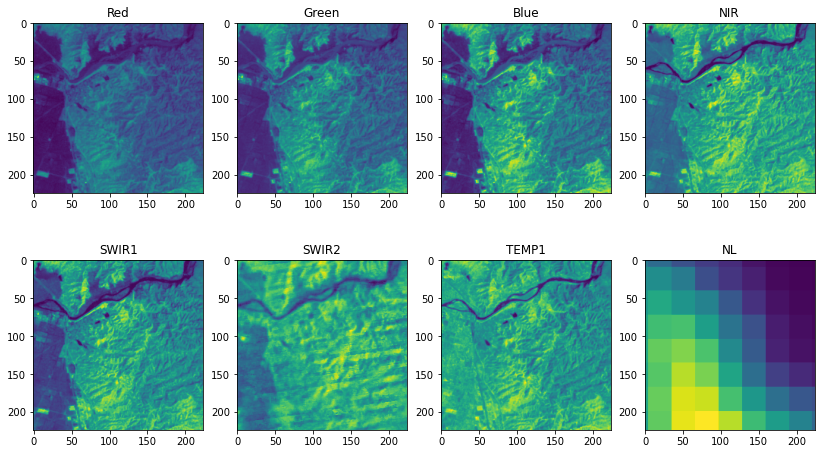

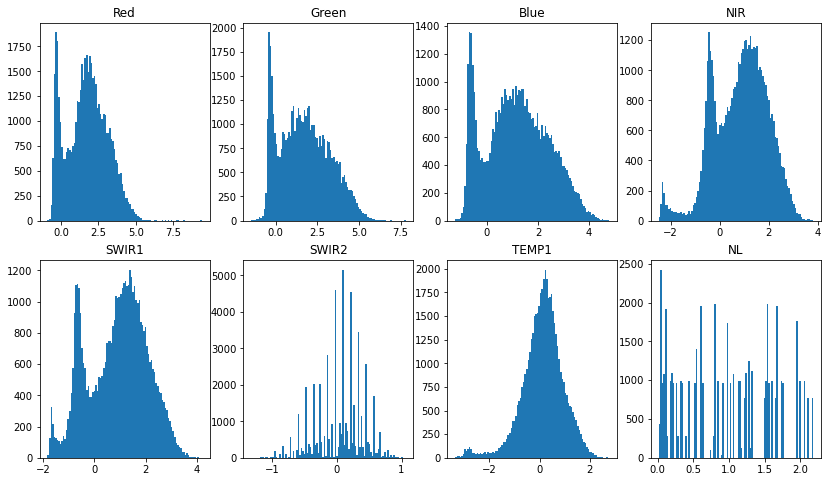

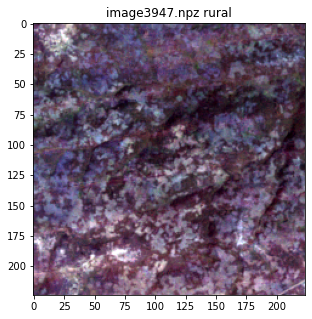

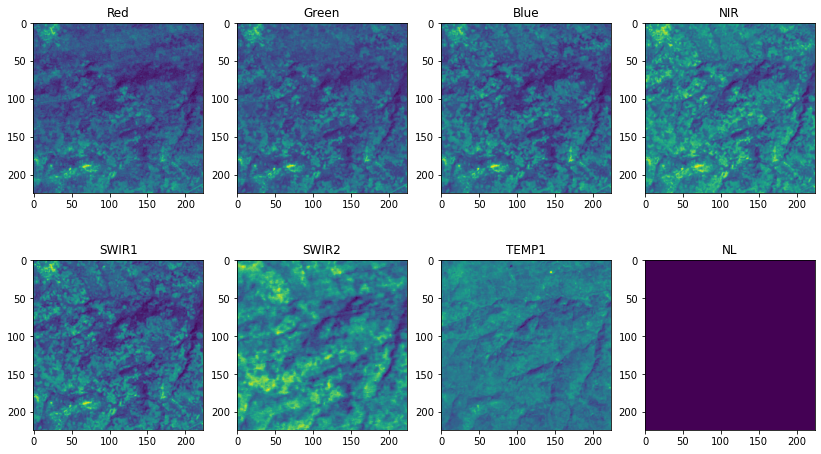

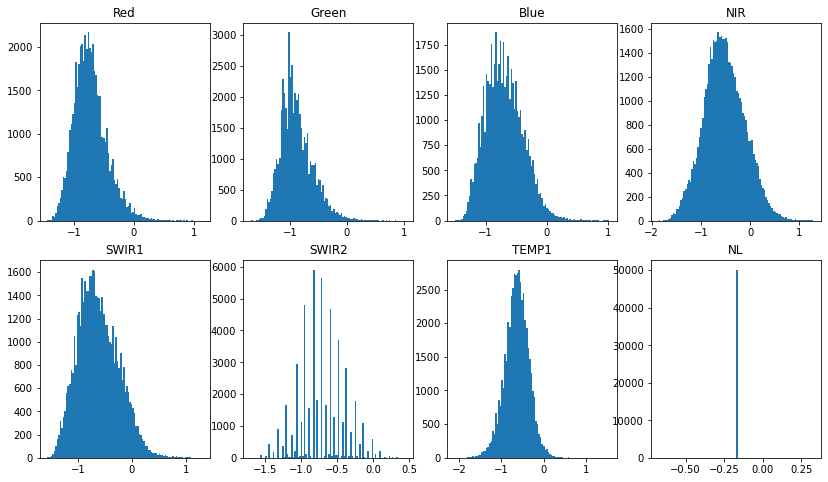

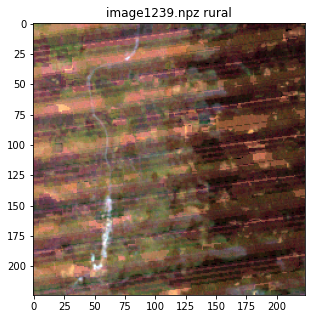

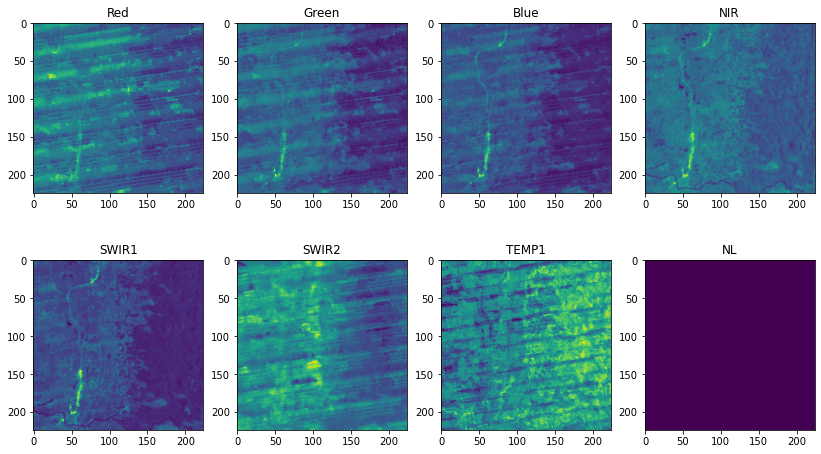

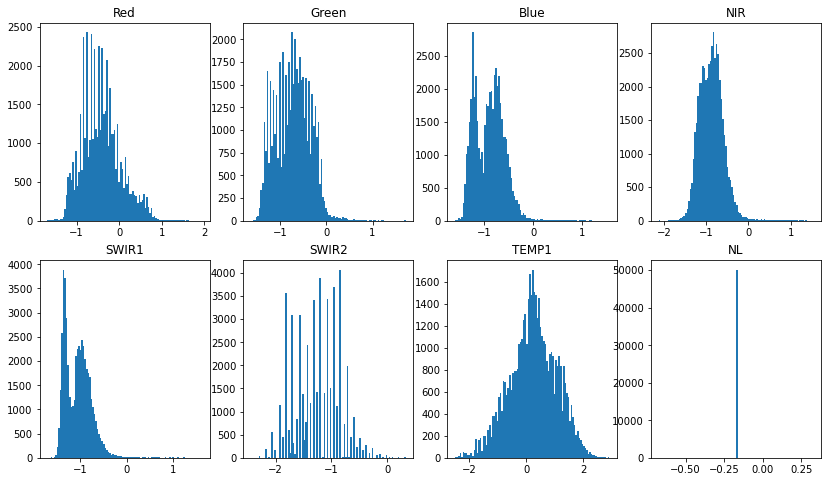

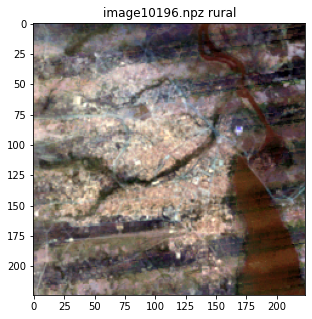

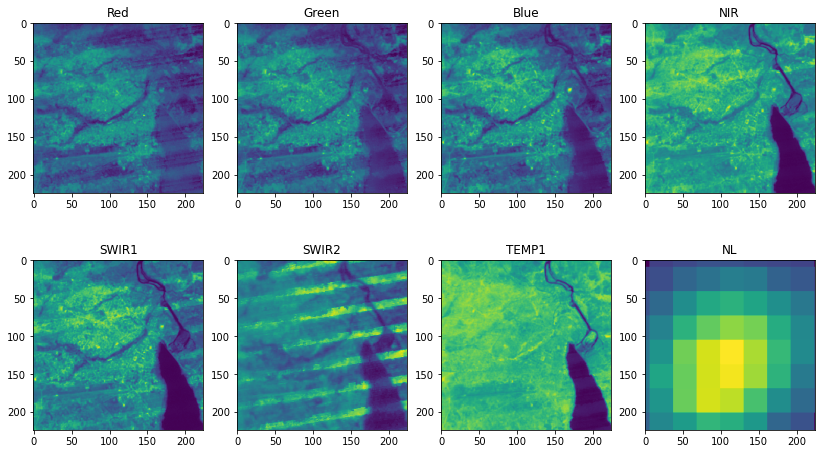

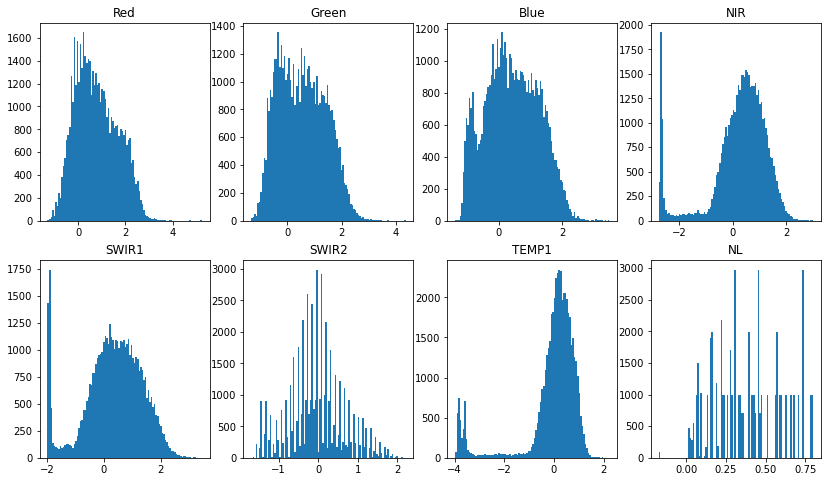

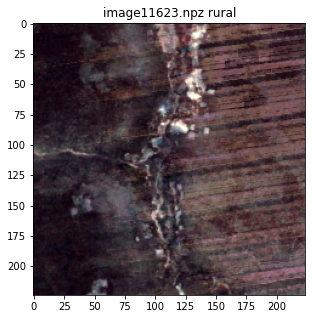

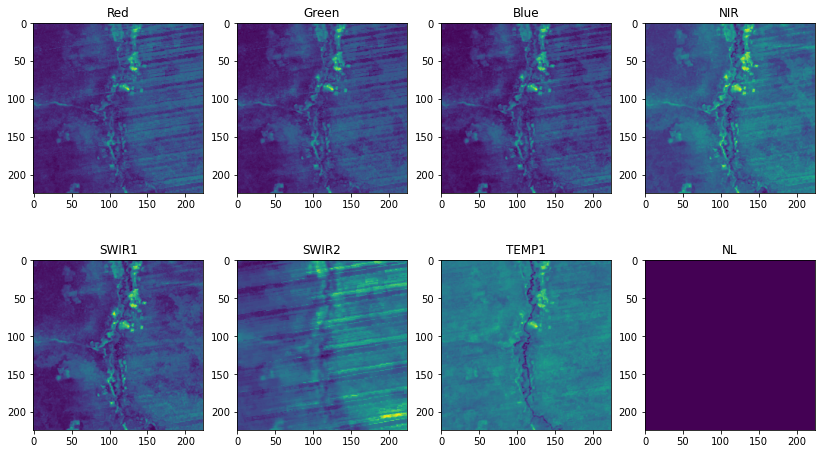

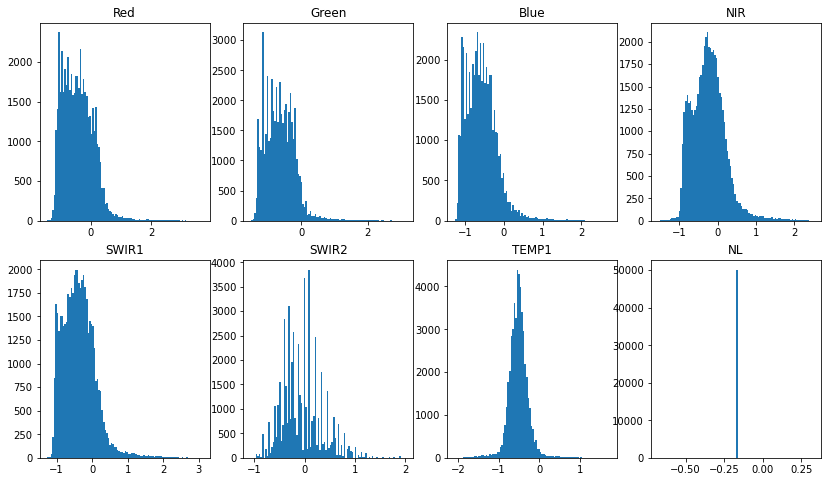

In [16]:
for n in range(10,100,10):
    row=df.iloc[n,:]
    filename=row['filename']
    urban=row['urban']
    area ='urban' if urban else 'rural'
    M=load(path+filename)
    Image=M['x']

    # generate RGB image (scaled)
    S=Image[:3,:,:].flatten()
    _min=percentile(S,0.1)
    _max=percentile(S,99.9)
    #print('Image',_min,_max)
    
    R=zeros([224,224,3])
    for i in range(3):
        R[:,:,i]=(Image[i,:,:]-_min)/(_max-_min)
    #print('R',min(R.flatten()),max(R.flatten()))
    R[R>1]=1
    R[R<0]=0

    figure(figsize=[5,5])
    imshow(R)
    title(filename+' '+area)
    figure(figsize=[14,8])
    i=1
    for j in range(8):
        subplot(2,4,i)
        i+=1
        imshow(Image[j,:,:])
        title(band_names[j])

    figure(figsize=[14,8])
    i=1
    for j in range(8):
        subplot(2,4,i)
        i+=1
        hist(Image[j,:,:].flatten(),bins=100)
        title(band_names[j])